<a href="https://colab.research.google.com/github/s319848/crafting-tech-intersectionality-2025/blob/main/CT_semantic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import itertools
from bert_score import score
import pandas as pd
from IPython.display import display


In [3]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
GPU name: Tesla T4


In [4]:
sentences = [
    "Creates significant privacy concerns by tracking individuals without their consent.",
            "Can lead to misidentification and discrimination, disproportionately affecting marginalized groups.",
            "Risks reinforcing existing biases in algorithmic decisions, impacting access to services based on race or gender.",
            "Increases the potential for misuse of personal data, leading to unauthorized surveillance or profiling.",
            "Generates a constant feeling of being monitored, which can erode personal freedom and trust.",
            "Exposes individuals to security risks, such as data breaches or misuse of biometric information.",
            "Negatively impacts those with lower tech literacy, making it harder for them to understand their rights or contest inaccuracies.",
    "Leads to privacy invasions through constant surveillance and collection of personal data without consent.",
            "Risks misidentification and discrimination, particularly affecting marginalized groups based on race, age, or gender.",
            "Creates an environment of mistrust and unease due to the perception of being constantly monitored.",
            "May exacerbate existing biases in service provision, resulting in unequal access to services for certain demographics.",
            "Raises concerns about the misuse of personal data, including unauthorized sharing and hacking.",
            "Limits individuals' ability to understand or challenge data mishandling due to varied levels of education and tech literacy.",
    "Leads to privacy violations due to tracking individuals without their consent.",
            "Creates increased surveillance culture, making individuals feel constantly monitored.",
            "Risks misidentification, particularly for marginalized groups based on race or age.",
            "Causes discriminatory outcomes in accessing services due to biased algorithms.",
            "Results in potential misuse of personal data, raising concerns about data privacy.",
            "Leaves vulnerable individuals without understanding of their rights or technology implications.",
            "Increases the likelihood of unfair profiling based on demographic characteristics.",
            "Contributes to a sense of distrust towards authorities and technological systems.",
            "Risks overlooking the needs of less tech-savvy populations in service provision.",
            "May establish an environment where personal freedoms are compromised.",
     "Misidentification due to biases in the technology can lead to unfair treatment in professional settings.",
            "Privacy concerns arise from the constant monitoring and storage of personal data without consent.",
            "The technology may reinforce societal biases, disproportionately affecting marginalized groups based on race, gender, or age.",
            "Reliance on facial recognition can create a culture of surveillance that undermines trust and personal interactions.",
            "Individuals may face added stress and scrutiny in remote work settings due to the potential for inaccurate identity validation.",
            "Lack of technological understanding among certain demographics could lead to exclusion or disadvantage in professional environments.",
    "Leads to privacy concerns as personal data may be collected, stored, or misused without consent.",
            "Causes misidentification, particularly for older individuals and marginalized groups, leading to unfair treatment or exclusion in professional settings.",
            "Reinforces biases against certain demographics, affecting job security and professional reputation.",
            "Creates an environment of constant surveillance, making employees feel uncomfortable and undervalued.",
            "Introduces barriers for those who are less tech-savvy, potentially excluding them from equal participation in virtual meetings.",
     "Leads to misidentification, particularly affecting individuals based on race, age, or gender, which may result in unfair treatment in professional settings.",
            "Raises significant privacy concerns due to the potential for personal data to be collected, stored, and misused without consent.",
            "Reinforces bias and discrimination against marginalized groups, which could impact job security and opportunities.",
            "Creates a feeling of constant surveillance, which can be intrusive and detrimental to workplace trust and employee morale.",
            "Introduces barriers for those less tech-savvy, who may struggle to navigate the technology and its implications, exacerbating inequalities in professional environments.",
            "May undermine confidence and credibility during meetings if individuals are not accurately recognized or are unfairly scrutinized based on flawed technology.",
     "Leads to misidentification and wrongful accusations, particularly for marginalized groups based on race and age.",
            "Raises significant privacy concerns due to potential surveillance without consent.",
            "Reinforces existing social biases and discrimination, impacting trust in institutions and technology.",
            "Limits opportunities for individuals if algorithms misrepresent or overlook specific demographics in decision-making processes, such as hiring.",
            "Creates a sense of vulnerability and unease among individuals who may be disproportionately affected by flawed algorithmic decisions.",
            "Undermines personal freedoms as constant surveillance can restrict individuals' movements and actions in public spaces.",
    "Leads to biased outcomes and misidentification based on race, gender, or age.",
            "Increases privacy concerns due to surveillance and data collection without consent.",
            "Results in wrongful accusations or unfair treatment in law enforcement and public interactions.",
            "Reinforces systemic inequalities and discrimination against marginalized groups.",
            "May not accurately recognize older individuals or those from diverse backgrounds.",
            "Creates distrust in technology and institutions if misidentifications occur frequently.",
            "Risks individuals\u2019 personal data being misused or mishandled.",
    "Leads to misidentification, particularly for individuals from diverse racial and ethnic backgrounds, resulting in wrongful accusations or unfair treatment.",
            "Raises significant privacy concerns, as personal data may be collected and analyzed without consent, leading to feelings of constant surveillance.",
            "Reinforces existing biases and systemic inequalities, especially against marginalized groups, by misrepresenting or overlooking their identities.",
            "Results in lack of trust in technology and institutions due to inaccuracies in algorithmic decisions and profiling.",
            "Creates barriers to employment and social opportunities for those affected by flawed algorithms, impacting their daily lives.",
            "Makes certain demographics more vulnerable to scrutiny and discrimination, with specific concern for older individuals and women.",
            "Exacerbates feelings of helplessness in challenging unfair outcomes, particularly for those with lower education levels or less technical understanding.",
    "Misidentification can occur, particularly affecting older individuals and people from marginalized racial backgrounds, leading to wrongful access denials or scrutiny.",
            "Privacy invasion arises when facial recognition technology collects and stores individuals' images without their consent, creating a feeling of constant surveillance.",
            "Biases in facial recognition technology can result in unfair treatment, reinforcing discrimination against certain demographics based on race or age.",
            "Lack of understanding of the technology can leave individuals vulnerable, particularly those with lower education levels, making it difficult to challenge erroneous outcomes.",
            "Potential misuse of personal data raises concerns about security and privacy, as individuals may not be informed about how their data is utilized or shared.",
    "Misidentification can lead to wrongful access denials or unfair treatment, particularly affecting older individuals and marginalized racial groups.",
            "Privacy invasion occurs when individuals are tracked or monitored without their consent, creating an uncomfortable atmosphere of constant surveillance.",
            "Biases inherent in facial recognition algorithms can result in discriminatory outcomes, disproportionately impacting certain demographics.",
            "Lack of transparency and understanding about how data is collected, used, and stored can leave individuals vulnerable to misuse.",
            "Trust in public spaces may be eroded due to the surveillance capabilities of facial recognition technology, contributing to a chilling effect on personal freedoms.",
    "Misidentification can lead to wrongful access denials, especially for older individuals and marginalized racial groups.",
            "There are significant privacy invasion concerns, as facial recognition technology often tracks individuals without their consent.",
            "The technology may reinforce existing biases, leading to unfair treatment and discrimination based on race or gender.",
            "Constant surveillance can create a chilling effect on personal autonomy and freedom, making individuals feel monitored in public spaces.",
            "Lack of transparency in how data is collected and used raises concerns about potential misuse of personal information.",
            "Inaccuracies in the technology can disproportionately affect individuals with lower tech literacy or education, making it difficult for them to navigate challenges arising from misidentifications.",
            "Dependence on facial recognition technology for secure access control can create barriers for those who do not fit the typical demographic profiles used in training the algorithms.",
    "Reinforces biases if the facial recognition technology is not equally accurate for all individuals.",
            "Undermines the right to privacy if used in a way that limits public access to information.",
            "Creates a gender disparity in access to the technology used for identification.",
            "Leads to job losses and increased unemployment in the security sector.",
    "Undermines the right to privacy if the facial analysis data is not properly secured.",
    "The AI system could potentially undermine efforts to eliminate all forms of discrimination against women if the facial recognition technology is biased and discriminates against women. This could occur if the AI system is trained on data sets that do not adequately represent all genders, leading to inaccurate and biased results.",
            "While the AI system does not directly undermine any specific global equality objectives, it's important to note that facial recognition technology has been criticized for potential biases and discrimination, which could potentially undermine efforts to ensure equal opportunity and reduce unequal treatment and social outcomes. If the system's algorithms are not properly trained and tested, they could potentially reinforce discriminatory patterns and perceived unfair treatment.",
            "The use of facial recognition technology could potentially undermine efforts to guarantee public access to information and uphold fundamental rights and freedoms. For example, if used for surveillance purposes, it could limit freedom of expression or privacy, weakening existing legal safeguards that protect citizens' right to access information.",
            "The AI system could potentially undermine individuals' right to physical and psychological integrity if the facial data sets used are obtained without the consent of the individuals, infringing on their right to security of person.",
            "The AI system could potentially undermine individuals' fundamental right to be legally recognized as persons if the facial data sets used are obtained without the consent of the individuals, infringing on their right to recognition everywhere as a person before the law.",
            "The AI system could potentially infringe on privacy rights if the facial data sets are obtained without consent or used inappropriately.",
            "The AI system could potentially undermine individuals' right to the protection of their moral and material interests if the facial data sets are used without the consent of the individuals, infringing on their right to the protection of their moral and material interests." ,
    "Discriminates against certain individuals during the identity validation process.",
            "Infringes on privacy if used to monitor employees without their knowledge or consent.",
            "Creates a stressful work environment by excessively monitoring employees.",
            "Increases inequalities if the system is biased or discriminatory.",
    "Discriminates against certain groups of women who do not have the necessary identification documents or face barriers in accessing the technology.",
            "Incorrectly identifies legitimate voters as fraudulent, leading to unfair elections.",
            "Intrudes on the privacy of voters beyond what is necessary for verifying their identities.",
            "Denies legitimate voters their right to participate in the government if incorrectly identified as fraudulent.",
            "Undermines equal opportunities for leadership at all levels of decision-making in political, economic and public life if not properly designed or implemented.",
            "Does not support decent work for all if biases lead to unfair elections and policies.",
    "Reinforces existing biases or discrimination if not properly designed or implemented.",
            "Infringes on citizens' privacy if the data collected for personalized services is misused or mishandled.",
    "Could lead to misidentification, particularly affecting older individuals and marginalized racial groups, resulting in wrongful disenfranchisement at the polls.",
            "Raises significant privacy concerns, as personal data may be misused or mishandled without consent.",
            "Creates unnecessary barriers for tech-averse individuals or those without proper education, making it difficult for them to navigate the voting process.",
            "Risks reinforcing existing biases and discrimination, disproportionately impacting specific demographics during identity verification.",
            "May discourage voter participation due to fear of inaccuracies and negative experiences with technology.",
    "Leads to misidentification, particularly affecting older individuals and marginalized racial groups, which could disenfranchise eligible voters.",
            "Creates significant privacy concerns, including the potential misuse of personal data and unauthorized surveillance.",
            "Introduces bias in the identification process, disproportionately impacting people of color and women, raising fairness issues.",
            "Complicates the voting process for less tech-savvy individuals, potentially deterring participation from older adults and those with limited technology experience.",
            "Raises concerns about the accuracy of the technology, which can lead to wrongful denials of voting rights based on flawed algorithms.",
            "Increases anxiety and distrust in the electoral process due to potential bias and surveillance imposed by the technology.",
            "Could lead to a lack of transparency and accountability in how the technology is implemented and used in voting processes.",
    "Leads to misidentification, especially for older individuals and marginalized racial groups, resulting in potential disenfranchisement at polling places.",
            "Risks creating barriers for those who are less tech-savvy or comfortable with technology, particularly older voters and individuals with lower education levels.",
            "Raises significant privacy concerns regarding the misuse of personal data and potential government surveillance.",
            "Reflects and reinforces existing biases in algorithms, which may disproportionately affect people of color and women, leading to unfair treatment during voting.",
            "Can create an intimidating and confusing experience for individuals who do not fully understand how the technology works, thereby complicating the voting process.",
            "May result in wrongful accusations of fraud or other challenges for voters based on errors in facial recognition, heightening anxiety and distrust in the electoral system.",
            "Has the potential to deter eligible voters due to discomfort with invasive technology or fear of inaccuracies impacting their voting rights.",
    "Leads to privacy invasion through constant monitoring without consent.",
            "Misidentifies fatigue based on facial features, resulting in false positives and unfair targeting.",
            "Poses risks of bias in the algorithms, disproportionately affecting certain demographics based on race, gender, or age.",
            "Creates unnecessary stress and anxiety for drivers who are wrongly flagged as fatigued.",
            "Undermines personal responsibility by relying too heavily on technology for assessing driver alertness.",
            "Risks misinterpretation of natural expressions, leading to unjust penalties or scrutiny.",
            "Raises concerns about the potential misuse of collected data, further eroding trust in the technology.",
    "Leads to privacy invasion by continuously monitoring individuals without their consent.",
            "Misidentifies individuals, resulting in false positives that can lead to unfair penalties or interventions.",
            "Displays bias against certain demographics, particularly based on race or age, which can lead to discrimination.",
            "Creates a false sense of security by relying on technology instead of human judgment in assessing fatigue.",
            "Causes unnecessary stress and anxiety for individuals who feel constantly scrutinized while driving.",
            "Risks misuse of personal data, including potential sharing or exploitation without consent.",
            "Undermines personal responsibility by shifting accountability away from drivers to technology.",
            "Results in misunderstandings that could lead to legal troubles or impact driving records unfairly.",
    "Privacy concerns arise due to constant monitoring, which can feel invasive and lead to distrust in the technology.",
            "Facial recognition technology could misidentify or incorrectly flag individuals as fatigued, resulting in false positives and unnecessary scrutiny.",
            "Bias in the algorithms may lead to unfair targeting of certain demographics, particularly older adults, women, and people of color.",
            "There is a risk of misinterpretation based on individual expressions or features, which could unfairly impact individuals' driving capabilities or lead to penalties.",
            "The technology could lead to data misuse or sharing without consent, raising concerns about personal information security.",
            "Reliance on technology for detecting fatigue may undermine personal responsibility and awareness of driver alertness.",
            "Individuals with lower education or tech familiarity might struggle with understanding or contesting misjudgments made by the technology."
        ]

print(len(sentences))

142


In [ ]:
# Generate all unique, unordered sentence pairs (no self-comparisons)
pairs = list(itertools.combinations(sentences, 2))

# Split into candidate and reference lists
cands = [s1 for s1, s2 in pairs]
refs = [s2 for s1, s2 in pairs]

print(len(cands))
print(len(refs))

print(cands[0])
print(refs[0])

10011
10011
Creates significant privacy concerns by tracking individuals without their consent.
Can lead to misidentification and discrimination, disproportionately affecting marginalized groups.


In [ ]:
# Compute BERTScore (F1 only)
_, _, F1 = score(cands, refs, lang="en", verbose=False)

# Create DataFrame with results
results_df = pd.DataFrame({
    "Sentence 1": cands,
    "Sentence 2": refs,
    "BERTScore (F1)": F1.numpy()
})

# Show the DataFrame
print(results_df)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                              Sentence 1  \
0      Creates significant privacy concerns by tracki...   
1      Creates significant privacy concerns by tracki...   
2      Creates significant privacy concerns by tracki...   
3      Creates significant privacy concerns by tracki...   
4      Creates significant privacy concerns by tracki...   
...                                                  ...   
10006  There is a risk of misinterpretation based on ...   
10007  There is a risk of misinterpretation based on ...   
10008  The technology could lead to data misuse or sh...   
10009  The technology could lead to data misuse or sh...   
10010  Reliance on technology for detecting fatigue m...   

                                              Sentence 2  BERTScore (F1)  
0      Can lead to misidentification and discriminati...        0.850798  
1      Risks reinforcing existing biases in algorithm...        0.847569  
2      Increases the potential for misuse of personal.

Quantiles:
 0.25    0.856395
0.50    0.864468
0.75    0.874236
0.90    0.887045
0.95    0.899278
Name: BERTScore (F1), dtype: float64


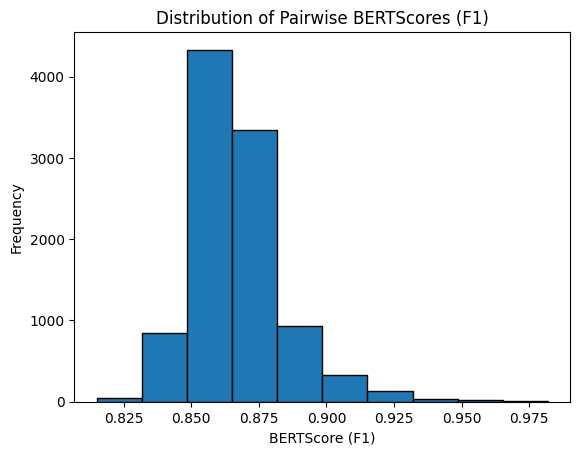

In [ ]:
# Compute summary statistics
quantiles = results_df["BERTScore (F1)"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])
print("Quantiles:\n", quantiles)

# Optionally plot a histogram (requires matplotlib)
import matplotlib.pyplot as plt

plt.hist(results_df["BERTScore (F1)"], bins=10, edgecolor="black")
plt.title("Distribution of Pairwise BERTScores (F1)")
plt.xlabel("BERTScore (F1)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
max_score = results_df["BERTScore (F1)"].max()
best_pair = results_df[results_df["BERTScore (F1)"] == max_score]

print("Maximum BERTScore:")
print(best_pair.to_string(index=False))

min_score = results_df["BERTScore (F1)"].min()
worst_pair = results_df[results_df["BERTScore (F1)"] == min_score]

print("Minimum BERTScore:")
print(worst_pair.to_string(index=False))


Maximum BERTScore:
                                                                                                                                         Sentence 1                                                                                                              Sentence 2  BERTScore (F1)
Misidentification can lead to wrongful access denials or unfair treatment, particularly affecting older individuals and marginalized racial groups. Misidentification can lead to wrongful access denials, especially for older individuals and marginalized racial groups.        0.981848
Minimum BERTScore:
                                                                       Sentence 1                                                                                                                                                                                                                                                                                                                         

In [ ]:
#Find the minimum bert score greater than a certain percentile

# Compute the 50% (median) percentile
median_score = results_df["BERTScore (F1)"].quantile(0.90)

# Filter for scores greater than the median
greater_than_median = results_df[results_df["BERTScore (F1)"] > median_score]

greater_than_median.head()

# # Find the minimum among those
# min_above_median_score = greater_than_median["BERTScore (F1)"].min()
# pair = greater_than_median[greater_than_median["BERTScore (F1)"] == min_above_median_score]

# print("Minimum BERTScore above 90th percentile:")
# print(pair.to_string(index=False))

,Sentence 1,Sentence 2,BERTScore (F1)
6,Creates significant privacy concerns by tracki...,Leads to privacy invasions through constant su...,0.905566
12,Creates significant privacy concerns by tracki...,Leads to privacy violations due to tracking in...,0.937194
13,Creates significant privacy concerns by tracki...,"Creates increased surveillance culture, making...",0.895633
23,Creates significant privacy concerns by tracki...,Privacy concerns arise from the constant monit...,0.903318
28,Creates significant privacy concerns by tracki...,Leads to privacy concerns as personal data may...,0.899370


In [ ]:
# Step 1: Choose the quantile threshold
quantile_threshold = 0.90  # or any quantile value
threshold_value = results_df["BERTScore (F1)"].quantile(quantile_threshold)

# Step 2: Filter rows with BERTScore > threshold
filtered_df = results_df[results_df["BERTScore (F1)"] > threshold_value]

# Step 3: Get the 5 sentence pairs with the lowest BERTScore in this filtered set
lowest_above_threshold = filtered_df.nsmallest(5, "BERTScore (F1)")

# Step 4: Display without truncation
import pandas as pd
with pd.option_context('display.max_colwidth', None):
    print(lowest_above_threshold)

#90TH PERCENTILE HAS 5/5 CONTEXTUALLY SIMILAR SENTENCES
median_score = results_df["BERTScore (F1)"].quantile(quantile_threshold)
print(f"{int(quantile_threshold*100)}th percentile is {median_score}")

                                                                                                                                                    Sentence 1  \
3067                                                  Misidentification due to biases in the technology can lead to unfair treatment in professional settings.   
3819  Causes misidentification, particularly for older individuals and marginalized groups, leading to unfair treatment or exclusion in professional settings.   
6892     Biases in facial recognition technology can result in unfair treatment, reinforcing discrimination against certain demographics based on race or age.   
7356                          Lack of transparency and understanding about how data is collected, used, and stored can leave individuals vulnerable to misuse.   
1826                                                                            Leads to privacy violations due to tracking individuals without their consent.   

                           

In [ ]:
# Step 1: Choose the quantile threshold
quantile_threshold = 0.85  # or any quantile value
threshold_value = results_df["BERTScore (F1)"].quantile(quantile_threshold)

# Step 2: Filter rows with BERTScore > threshold
filtered_df = results_df[results_df["BERTScore (F1)"] > threshold_value]

# Step 3: Get the 5 sentence pairs with the lowest BERTScore in this filtered set
lowest_above_threshold = filtered_df.nsmallest(5, "BERTScore (F1)")

# Step 4: Display without truncation
import pandas as pd
with pd.option_context('display.max_colwidth', None):
    print(lowest_above_threshold)

#85TH PERCENTILE HAS /5 CONTEXTUALLY SIMILAR SENTENCES
median_score = results_df["BERTScore (F1)"].quantile(quantile_threshold)
print(f"{int(quantile_threshold*100)}th percentile is {median_score}")

                                                                                                                  Sentence 1  \
1410  May exacerbate existing biases in service provision, resulting in unequal access to services for certain demographics.   
7768  Lack of transparency in how data is collected and used raises concerns about potential misuse of personal information.   
3719                        Leads to privacy concerns as personal data may be collected, stored, or misused without consent.   
1328                      Creates an environment of mistrust and unease due to the perception of being constantly monitored.   
3105                Misidentification due to biases in the technology can lead to unfair treatment in professional settings.   

                                                                                                                                                   Sentence 2  \
1410                                      Results in lack of trust in 

### COMMON USES

In [5]:
#USE 1 : SECURE ACCESS CONTROL

use_1_general = [
            "Misidentification can occur, particularly affecting older individuals and people from marginalized racial backgrounds, leading to wrongful access denials or scrutiny.",
            "Privacy invasion arises when facial recognition technology collects and stores individuals' images without their consent, creating a feeling of constant surveillance.",
            "Biases in facial recognition technology can result in unfair treatment, reinforcing discrimination against certain demographics based on race or age.",
            "Lack of understanding of the technology can leave individuals vulnerable, particularly those with lower education levels, making it difficult to challenge erroneous outcomes.",
            "Potential misuse of personal data raises concerns about security and privacy, as individuals may not be informed about how their data is utilized or shared."
        ]

use_1_black_women = [
            "Misidentification can lead to wrongful access denials or unfair treatment, particularly affecting older individuals and marginalized racial groups.",
            "Privacy invasion occurs when individuals are tracked or monitored without their consent, creating an uncomfortable atmosphere of constant surveillance.",
            "Biases inherent in facial recognition algorithms can result in discriminatory outcomes, disproportionately impacting certain demographics.",
            "Lack of transparency and understanding about how data is collected, used, and stored can leave individuals vulnerable to misuse.",
            "Trust in public spaces may be eroded due to the surveillance capabilities of facial recognition technology, contributing to a chilling effect on personal freedoms."
        ]

use_1_oppressed = [
            "Misidentification can lead to wrongful access denials, especially for older individuals and marginalized racial groups.",
            "There are significant privacy invasion concerns, as facial recognition technology often tracks individuals without their consent.",
            "The technology may reinforce existing biases, leading to unfair treatment and discrimination based on race or gender.",
            "Constant surveillance can create a chilling effect on personal autonomy and freedom, making individuals feel monitored in public spaces.",
            "Lack of transparency in how data is collected and used raises concerns about potential misuse of personal information.",
            "Inaccuracies in the technology can disproportionately affect individuals with lower tech literacy or education, making it difficult for them to navigate challenges arising from misidentifications.",
            "Dependence on facial recognition technology for secure access control can create barriers for those who do not fit the typical demographic profiles used in training the algorithms."
        ]
use_1_eg = [
            "Reinforces biases if the facial recognition technology is not equally accurate for all individuals.",
            "Undermines the right to privacy if used in a way that limits public access to information.",
            "Creates a gender disparity in access to the technology used for identification.",
            "Leads to job losses and increased unemployment in the security sector."
        ]

In [6]:
#USE 134 : DETECTING DRIVER FATIGUE

use_134_general = [
            "Leads to privacy invasion through constant monitoring without consent.",
            "Misidentifies fatigue based on facial features, resulting in false positives and unfair targeting.",
            "Poses risks of bias in the algorithms, disproportionately affecting certain demographics based on race, gender, or age.",
            "Creates unnecessary stress and anxiety for drivers who are wrongly flagged as fatigued.",
            "Undermines personal responsibility by relying too heavily on technology for assessing driver alertness.",
            "Risks misinterpretation of natural expressions, leading to unjust penalties or scrutiny.",
            "Raises concerns about the potential misuse of collected data, further eroding trust in the technology."
        ]

use_134_black_women = [
            "Leads to privacy invasion by continuously monitoring individuals without their consent.",
            "Misidentifies individuals, resulting in false positives that can lead to unfair penalties or interventions.",
            "Displays bias against certain demographics, particularly based on race or age, which can lead to discrimination.",
            "Creates a false sense of security by relying on technology instead of human judgment in assessing fatigue.",
            "Causes unnecessary stress and anxiety for individuals who feel constantly scrutinized while driving.",
            "Risks misuse of personal data, including potential sharing or exploitation without consent.",
            "Undermines personal responsibility by shifting accountability away from drivers to technology.",
            "Results in misunderstandings that could lead to legal troubles or impact driving records unfairly."
        ]

use_134_oppressed = [
            "Privacy concerns arise due to constant monitoring, which can feel invasive and lead to distrust in the technology.",
            "Facial recognition technology could misidentify or incorrectly flag individuals as fatigued, resulting in false positives and unnecessary scrutiny.",
            "Bias in the algorithms may lead to unfair targeting of certain demographics, particularly older adults, women, and people of color.",
            "There is a risk of misinterpretation based on individual expressions or features, which could unfairly impact individuals' driving capabilities or lead to penalties.",
            "The technology could lead to data misuse or sharing without consent, raising concerns about personal information security.",
            "Reliance on technology for detecting fatigue may undermine personal responsibility and awareness of driver alertness.",
            "Individuals with lower education or tech familiarity might struggle with understanding or contesting misjudgments made by the technology."
        ]
use_134_eg = [
            "Undermines the right to privacy if the facial analysis data is not properly secured."
        ]

In [7]:
# USE 60 : USING FACIAL DATA TO REFINE ALGORITHMS

use_60_general = [
            "Leads to misidentification and wrongful accusations, particularly for marginalized groups based on race and age.",
            "Raises significant privacy concerns due to potential surveillance without consent.",
            "Reinforces existing social biases and discrimination, impacting trust in institutions and technology.",
            "Limits opportunities for individuals if algorithms misrepresent or overlook specific demographics in decision-making processes, such as hiring.",
            "Creates a sense of vulnerability and unease among individuals who may be disproportionately affected by flawed algorithmic decisions.",
            "Undermines personal freedoms as constant surveillance can restrict individuals' movements and actions in public spaces."
        ]

use_60_black_women = [
            "Leads to biased outcomes and misidentification based on race, gender, or age.",
            "Increases privacy concerns due to surveillance and data collection without consent.",
            "Results in wrongful accusations or unfair treatment in law enforcement and public interactions.",
            "Reinforces systemic inequalities and discrimination against marginalized groups.",
            "May not accurately recognize older individuals or those from diverse backgrounds.",
            "Creates distrust in technology and institutions if misidentifications occur frequently.",
            "Risks individuals\u2019 personal data being misused or mishandled."
        ]

use_60_oppressed = [
            "Leads to misidentification, particularly for individuals from diverse racial and ethnic backgrounds, resulting in wrongful accusations or unfair treatment.",
            "Raises significant privacy concerns, as personal data may be collected and analyzed without consent, leading to feelings of constant surveillance.",
            "Reinforces existing biases and systemic inequalities, especially against marginalized groups, by misrepresenting or overlooking their identities.",
            "Results in lack of trust in technology and institutions due to inaccuracies in algorithmic decisions and profiling.",
            "Creates barriers to employment and social opportunities for those affected by flawed algorithms, impacting their daily lives.",
            "Makes certain demographics more vulnerable to scrutiny and discrimination, with specific concern for older individuals and women.",
            "Exacerbates feelings of helplessness in challenging unfair outcomes, particularly for those with lower education levels or less technical understanding."
        ]

use_60_eg = [
            "The AI system could potentially undermine efforts to eliminate all forms of discrimination against women if the facial recognition technology is biased and discriminates against women. This could occur if the AI system is trained on data sets that do not adequately represent all genders, leading to inaccurate and biased results.",
            "While the AI system does not directly undermine any specific global equality objectives, it's important to note that facial recognition technology has been criticized for potential biases and discrimination, which could potentially undermine efforts to ensure equal opportunity and reduce unequal treatment and social outcomes. If the system's algorithms are not properly trained and tested, they could potentially reinforce discriminatory patterns and perceived unfair treatment.",
            "The use of facial recognition technology could potentially undermine efforts to guarantee public access to information and uphold fundamental rights and freedoms. For example, if used for surveillance purposes, it could limit freedom of expression or privacy, weakening existing legal safeguards that protect citizens' right to access information.",
            "The AI system could potentially undermine individuals' right to physical and psychological integrity if the facial data sets used are obtained without the consent of the individuals, infringing on their right to security of person.",
            "The AI system could potentially undermine individuals' fundamental right to be legally recognized as persons if the facial data sets used are obtained without the consent of the individuals, infringing on their right to recognition everywhere as a person before the law.",
            "The AI system could potentially infringe on privacy rights if the facial data sets are obtained without consent or used inappropriately.",
            "The AI system could potentially undermine individuals' right to the protection of their moral and material interests if the facial data sets are used without the consent of the individuals, infringing on their right to the protection of their moral and material interests."
        ]

### OVERLOOKED USES

In [8]:
# USE 70 : VERIFYING VOTER IDENTITIES TO PREVENT FRAUD

use_70_general = [
            "Could lead to misidentification, particularly affecting older individuals and marginalized racial groups, resulting in wrongful disenfranchisement at the polls.",
            "Raises significant privacy concerns, as personal data may be misused or mishandled without consent.",
            "Creates unnecessary barriers for tech-averse individuals or those without proper education, making it difficult for them to navigate the voting process.",
            "Risks reinforcing existing biases and discrimination, disproportionately impacting specific demographics during identity verification.",
            "May discourage voter participation due to fear of inaccuracies and negative experiences with technology."
        ]

use_70_black_women = [
            "Leads to misidentification, particularly affecting older individuals and marginalized racial groups, which could disenfranchise eligible voters.",
            "Creates significant privacy concerns, including the potential misuse of personal data and unauthorized surveillance.",
            "Introduces bias in the identification process, disproportionately impacting people of color and women, raising fairness issues.",
            "Complicates the voting process for less tech-savvy individuals, potentially deterring participation from older adults and those with limited technology experience.",
            "Raises concerns about the accuracy of the technology, which can lead to wrongful denials of voting rights based on flawed algorithms.",
            "Increases anxiety and distrust in the electoral process due to potential bias and surveillance imposed by the technology.",
            "Could lead to a lack of transparency and accountability in how the technology is implemented and used in voting processes."
        ]

use_70_oppressed = [
            "Leads to misidentification, especially for older individuals and marginalized racial groups, resulting in potential disenfranchisement at polling places.",
            "Risks creating barriers for those who are less tech-savvy or comfortable with technology, particularly older voters and individuals with lower education levels.",
            "Raises significant privacy concerns regarding the misuse of personal data and potential government surveillance.",
            "Reflects and reinforces existing biases in algorithms, which may disproportionately affect people of color and women, leading to unfair treatment during voting.",
            "Can create an intimidating and confusing experience for individuals who do not fully understand how the technology works, thereby complicating the voting process.",
            "May result in wrongful accusations of fraud or other challenges for voters based on errors in facial recognition, heightening anxiety and distrust in the electoral system.",
            "Has the potential to deter eligible voters due to discomfort with invasive technology or fear of inaccuracies impacting their voting rights."
        ]

use_70_eg = [
            "Discriminates against certain groups of women who do not have the necessary identification documents or face barriers in accessing the technology.",
            "Incorrectly identifies legitimate voters as fraudulent, leading to unfair elections.",
            "Intrudes on the privacy of voters beyond what is necessary for verifying their identities.",
            "Denies legitimate voters their right to participate in the government if incorrectly identified as fraudulent.",
            "Undermines equal opportunities for leadership at all levels of decision-making in political, economic and public life if not properly designed or implemented.",
            "Does not support decent work for all if biases lead to unfair elections and policies."
        ]

In [9]:
# USE 27 : VALIDATING REMOTE WORKER IDENTITY DURING VIRTUAL MEETINGS

use_27_general = [
            "Misidentification due to biases in the technology can lead to unfair treatment in professional settings.",
            "Privacy concerns arise from the constant monitoring and storage of personal data without consent.",
            "The technology may reinforce societal biases, disproportionately affecting marginalized groups based on race, gender, or age.",
            "Reliance on facial recognition can create a culture of surveillance that undermines trust and personal interactions.",
            "Individuals may face added stress and scrutiny in remote work settings due to the potential for inaccurate identity validation.",
            "Lack of technological understanding among certain demographics could lead to exclusion or disadvantage in professional environments."
        ]

use_27_black_women = [
            "Leads to privacy concerns as personal data may be collected, stored, or misused without consent.",
            "Causes misidentification, particularly for older individuals and marginalized groups, leading to unfair treatment or exclusion in professional settings.",
            "Reinforces biases against certain demographics, affecting job security and professional reputation.",
            "Creates an environment of constant surveillance, making employees feel uncomfortable and undervalued.",
            "Introduces barriers for those who are less tech-savvy, potentially excluding them from equal participation in virtual meetings."
        ]

use_27_oppressed = [
            "Leads to misidentification, particularly affecting individuals based on race, age, or gender, which may result in unfair treatment in professional settings.",
            "Raises significant privacy concerns due to the potential for personal data to be collected, stored, and misused without consent.",
            "Reinforces bias and discrimination against marginalized groups, which could impact job security and opportunities.",
            "Creates a feeling of constant surveillance, which can be intrusive and detrimental to workplace trust and employee morale.",
            "Introduces barriers for those less tech-savvy, who may struggle to navigate the technology and its implications, exacerbating inequalities in professional environments.",
            "May undermine confidence and credibility during meetings if individuals are not accurately recognized or are unfairly scrutinized based on flawed technology."
        ]

use_27_eg = [
            "Discriminates against certain individuals during the identity validation process.",
            "Infringes on privacy if used to monitor employees without their knowledge or consent.",
            "Creates a stressful work environment by excessively monitoring employees.",
            "Increases inequalities if the system is biased or discriminatory."
        ]

In [10]:
# USE 88 : IDENTIFYING CITIZENS FOR PERSONALIZED SERVICES

use_88_general = [
            "Creates significant privacy concerns by tracking individuals without their consent.",
            "Can lead to misidentification and discrimination, disproportionately affecting marginalized groups.",
            "Risks reinforcing existing biases in algorithmic decisions, impacting access to services based on race or gender.",
            "Increases the potential for misuse of personal data, leading to unauthorized surveillance or profiling.",
            "Generates a constant feeling of being monitored, which can erode personal freedom and trust.",
            "Exposes individuals to security risks, such as data breaches or misuse of biometric information.",
            "Negatively impacts those with lower tech literacy, making it harder for them to understand their rights or contest inaccuracies."
        ]

use_88_black_women = [
            "Leads to privacy invasions through constant surveillance and collection of personal data without consent.",
            "Risks misidentification and discrimination, particularly affecting marginalized groups based on race, age, or gender.",
            "Creates an environment of mistrust and unease due to the perception of being constantly monitored.",
            "May exacerbate existing biases in service provision, resulting in unequal access to services for certain demographics.",
            "Raises concerns about the misuse of personal data, including unauthorized sharing and hacking.",
            "Limits individuals' ability to understand or challenge data mishandling due to varied levels of education and tech literacy."
        ]

use_88_oppressed = [
            "Leads to privacy violations due to tracking individuals without their consent.",
            "Creates increased surveillance culture, making individuals feel constantly monitored.",
            "Risks misidentification, particularly for marginalized groups based on race or age.",
            "Causes discriminatory outcomes in accessing services due to biased algorithms.",
            "Results in potential misuse of personal data, raising concerns about data privacy.",
            "Leaves vulnerable individuals without understanding of their rights or technology implications.",
            "Increases the likelihood of unfair profiling based on demographic characteristics.",
            "Contributes to a sense of distrust towards authorities and technological systems.",
            "Risks overlooking the needs of less tech-savvy populations in service provision.",
            "May establish an environment where personal freedoms are compromised."
        ]

use_88_eg = [
            "Reinforces existing biases or discrimination if not properly designed or implemented.",
            "Infringes on citizens' privacy if the data collected for personalized services is misused or mishandled."
        ]

### METRICS COMPUTATION

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
common_uses = {
    1: {
        "General": use_1_general,
        "Non-white, Non-men": use_1_black_women,
        "Marginalized": use_1_oppressed,
        "Baseline": use_1_eg
    },
    134: {
        "General": use_134_general,
        "Non-white, Non-men": use_134_black_women,
        "Marginalized": use_134_oppressed,
        "Baseline": use_134_eg
    },
    60: {
       "General": use_60_general,
        "Non-white, Non-men": use_60_black_women,
        "Marginalized": use_60_oppressed,
        "Baseline": use_60_eg
    }
}

In [13]:
#0.8870450854301453

def evaluate_focus_group(generated, baseline, bert_threshold=0.8870450854301453):
    # List to store matched risk pairs (generated, baseline, score)
    matches = []

    # Store the best BERTScore for each generated risk (regardless of threshold)
    best_scores = []

    # Track which baseline risks have already been matched (enforces 1-to-1 matching)
    used_baseline_indices = set()

    # Loop over each risk generated by the focus group
    for g in generated:
        best_score = None           # Best similarity score for this generated risk
        best_match_idx = None       # Index of the best matching baseline risk

        # Compare the generated risk to each baseline risk
        for i, b in enumerate(baseline):
            # Skip baseline risks that have already been matched
            if i in used_baseline_indices:
                continue

            # Compute BERTScore similarity (Precision, Recall, F1) between the two risks
            P, R, F1 = score([g], [b], lang="en", verbose=False)

            # Convert the tensor output to a regular float
            f1_score = float(F1[0])

            # Update best score and best match index if this is the highest so far
            if best_score is None or f1_score > best_score:
                best_score = f1_score
                best_match_idx = i

        # If a score was calculated at all, store it for averaging
        if best_score is not None:
            best_scores.append(best_score)

            # If this match exceeds the similarity threshold, count it as a valid match
            if best_score >= bert_threshold:
                matches.append((g, baseline[best_match_idx], best_score))
                used_baseline_indices.add(best_match_idx)

    # Precision: proportion of generated risks that successfully matched the baseline
    precision = len(matches) / len(generated) if generated else 0

    # Recall: proportion of baseline risks that were recovered by the generated list
    recall = len(matches) / len(baseline) if baseline else 0

    # F1 Score: harmonic mean of precision and recall (0 if both are 0)
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # Average BERTScore of all best matches, whether or not they exceeded the threshold
    avg_bertscore = sum(best_scores) / len(best_scores) if best_scores else 0

    # Novel risks = generated risks that did not match any baseline risk
    novel_risks = len(generated) - len(matches)

    # Return all computed metrics
    return precision, recall, f1, avg_bertscore, novel_risks

In [14]:
# -------------------------------
# Loop and evaluate
# -------------------------------

all_results = []

for use_id, group_data in common_uses.items():
    baseline = group_data["Baseline"]
    for group_name, generated in group_data.items():
        if group_name == "Baseline":
            continue
        precision, recall, f1, avg_bertscore, novel_risks = evaluate_focus_group(generated, baseline)
        all_results.append({
            "Use ID": use_id,
            "Group": group_name,
            "Baseline coverage of generated risks": round(precision, 2),
            "Generated risks coverage of baseline": round(recall, 2),
            # "F1 Score": round(f1, 2),
            "Avg. BERTScore": round(avg_bertscore, 4),
            "Novel Risks": novel_risks
        })


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

In [15]:
df = pd.DataFrame(all_results)
display(df)
# Optionally save to CSV
df.to_csv("risk_evaluation_results.csv", index=False)

,Use ID,Group,Baseline coverage of generated risks,Generated risks coverage of baseline,Avg. BERTScore,Novel Risks
0,1,General,0.00,0.00,0.8725,5
1,1,"Non-white, Non-men",0.20,0.25,0.8725,4
2,1,Marginalized,0.00,0.00,0.8757,7
3,134,General,0.14,1.00,0.8700,6
4,134,"Non-white, Non-men",0.00,0.00,0.8606,8
5,134,Marginalized,0.00,0.00,0.8550,7
6,60,General,0.00,0.00,0.8657,6
7,60,"Non-white, Non-men",0.14,0.14,0.8550,6
8,60,Marginalized,0.14,0.14,0.8558,6


In [ ]:
# Create a matrix of BERTScores (F1)
rows = []
for g in use_27_oppressed:
    row = []
    for b in use_27_eg:
        _, _, F1 = score([g], [b], lang="en", verbose=False)
        row.append(float(F1[0]))
    rows.append(row)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

In [ ]:
# Convert to a pandas DataFrame
df_scores = pd.DataFrame(
    rows,
    index=[f"G{i+1}: {s[:50]}..." for i, s in enumerate(use_27_oppressed)],
    columns=[f"EG{i+1}: {s[:50]}..." for i, s in enumerate(use_27_eg)]
)

with pd.option_context('display.max_colwidth', None):
    display(df_scores)

,EG1: Discriminates against certain individuals during t...,EG2: Infringes on privacy if used to monitor employees ...,EG3: Creates a stressful work environment by excessivel...,EG4: Increases inequalities if the system is biased or ...
"G1: Leads to misidentification, particularly affecting...",0.859257,0.846292,0.850164,0.857196
G2: Raises significant privacy concerns due to the pot...,0.853186,0.890355,0.858774,0.855399
G3: Reinforces bias and discrimination against margina...,0.881381,0.858561,0.867436,0.884726
"G4: Creates a feeling of constant surveillance, which ...",0.854811,0.870998,0.906746,0.858975
"G5: Introduces barriers for those less tech-savvy, who...",0.858857,0.851464,0.865557,0.871087
G6: May undermine confidence and credibility during me...,0.865174,0.868940,0.871463,0.882576


In [16]:
overlooked_uses = {
    70: {
        "General": use_70_general,
        "Non-white, Non-men": use_70_black_women,
        "Marginalized": use_70_oppressed,
        "Baseline": use_70_eg
    },
    27: {
        "General": use_27_general,
        "Non-white, Non-men": use_27_black_women,
        "Marginalized": use_27_oppressed,
        "Baseline": use_27_eg
    },
    88: {
       "General": use_88_general,
        "Non-white, Non-men": use_88_black_women,
        "Marginalized": use_88_oppressed,
        "Baseline": use_88_eg
    }
}

In [17]:
overlooked_results = []

for use_id, group_data in overlooked_uses.items():
    baseline = group_data["Baseline"]
    for group_name, generated in group_data.items():
        if group_name == "Baseline":
            continue
        precision, recall, f1, avg_bertscore, novel_risks = evaluate_focus_group(generated, baseline)
        overlooked_results.append({
            "Use ID": use_id,
            "Group": group_name,
            "Baseline coverage of generated risks": round(precision, 2),
            "Generated risks coverage of baseline": round(recall, 2),
            # "F1 Score": round(f1, 2),
            "Avg. BERTScore": round(avg_bertscore, 4),
            "Novel Risks": novel_risks
        })

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

In [18]:
overlooked_df = pd.DataFrame(overlooked_results)
# print(overlooked_df)
display(overlooked_df)
# Optionally save to CSV
overlooked_df.to_csv("overlooked_risk_evaluation_results.csv", index=False)

,Use ID,Group,Baseline coverage of generated risks,Generated risks coverage of baseline,Avg. BERTScore,Novel Risks
0,70,General,0.00,0.00,0.8738,5
1,70,"Non-white, Non-men",0.00,0.00,0.8743,7
2,70,Marginalized,0.00,0.00,0.8760,7
3,27,General,0.17,0.25,0.8790,5
4,27,"Non-white, Non-men",0.60,0.75,0.8905,2
5,27,Marginalized,0.33,0.50,0.8825,4
6,88,General,0.14,0.50,0.8658,6
7,88,"Non-white, Non-men",0.17,0.50,0.8628,5
8,88,Marginalized,0.00,0.00,0.8668,10


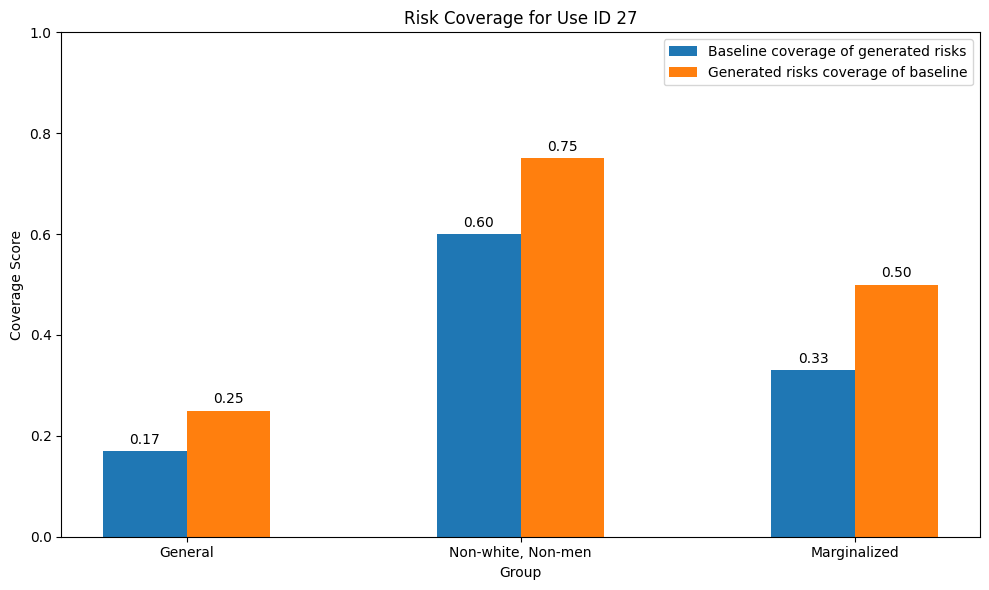

In [21]:
# prompt: Starting from the dataframe "df", write a function to plot a bar chart with the values of "baseline coverage of generated risks" and "generated risks coverage of baseline". The function must plot the values for one single use (use ID) with three different groups of bars, one for each group (dataframe column "group"). Make it so that the y axis covers the values from 0 to 1 and not from 0 to the max value.
import matplotlib.pyplot as plt

def plot_use_coverage(df, use_id, name):
    """
    Plots a bar chart for a specific use ID showing 'baseline coverage of generated risks'
    and 'generated risks coverage of baseline' across different groups.

    Args:
        df (pd.DataFrame): The DataFrame containing the evaluation results.
        use_id (int): The Use ID to plot.
    """
    # Filter the dataframe for the specific Use ID
    df_use = df[df["Use ID"] == use_id].copy()

    if df_use.empty:
        print(f"No data found for Use ID: {use_id}")
        return

    # Ensure the relevant columns are numeric
    df_use['Baseline coverage of generated risks'] = pd.to_numeric(df_use['Baseline coverage of generated risks'])
    df_use['Generated risks coverage of baseline'] = pd.to_numeric(df_use['Generated risks coverage of baseline'])

    # Define the groups and the metrics to plot
    groups = df_use['Group'].tolist()
    metrics = ['Baseline coverage of generated risks', 'Generated risks coverage of baseline']

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.25
    index = range(len(groups))

    # Plot bars for each metric
    bars1 = ax.bar([i for i in index], df_use[metrics[0]], bar_width, label=metrics[0])
    bars2 = ax.bar([i + bar_width for i in index], df_use[metrics[1]], bar_width, label=metrics[1])

    # Add labels, title, and ticks
    ax.set_xlabel('Group')
    ax.set_ylabel('Coverage Score')
    ax.set_title(f'Risk Coverage for Use ID {use_id}')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(groups)
    ax.legend()

    # Set y-axis limits to 0 to 1
    ax.set_ylim(0, 1)

    # Add value labels on top of the bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)


    plt.tight_layout()
    plt.savefig(name)
    plt.show()

# Example usage: Plot for Use ID 1
# plot_use_coverage(df, 1)

# Example usage: Plot for Use ID 134
# plot_use_coverage(df, 134)

# Example usage: Plot for Use ID 60
# plot_use_coverage(df, 60)

# Example usage: Plot for Use ID 70 (from overlooked_df)
# plot_use_coverage(overlooked_df, 70)

# Example usage: Plot for Use ID 27 (from overlooked_df)
plot_use_coverage(overlooked_df, 27, 'use_27.pdf')

# Example usage: Plot for Use ID 88 (from overlooked_df)
# plot_use_coverage(overlooked_df, 88)
